# RBF神经网络  (Radial Basis Function Neural Network)

***

## 简介

RBF神经网络是一种FeedForward神经网络。可以逼近**任意的**非线性函数（所以RBF神经网络适用于拟合复杂的函数曲线，以及解决在该曲线上的回归问题）。
![rbf网络结构](./1.jpg "RBF神经网络")
图片引用自：[http://www.cnblogs.com/zhangchaoyang/articles/2591663.html](http://www.cnblogs.com/zhangchaoyang/articles/2591663.html )

### 输入、处理和输出

<font color='#0000ff'>*输入*</font>的每一个训练样本是一个m维向量，每个维度表示一个特征。若每个维度间数值差异较大应进行归一化操作。

每个<font color='#0000ff'>*输出*</font>样本为一个n维向量（图中n=1）。同输入一样也最好进行归一化。

<font color='#0000ff'>*隐藏层*</font>一层。隐藏节点个数为p（p >= m）。每个节点都是一个RBF核，对每一个训练样本$X_{train}$，每个节点$\phi$都计算其对应的输出RBF(X)，若W中的系数合适，W与RBF(X)的线性组合应该得到真实的Y。

*一种特殊的情况：*当隐藏层节点个数与输入样本个数相同（p == n）时，其实可以完全完美拟合所有的输入样本，因为此时可以设置每个RBF核的中心依次分别位于每个训练样本的位置，则总存在一个足够小的半径使得每个RBF核两两无重叠，则其只对对应的训练样本产生输出。

***

## 关于RBF

### 核函数
RBF（径向基函数）是一类核函数。核函数还有很多，包括线性核函数，Sigmoid函数（BP中的激活函数是Sigmoid函数），径向基函数等。被广泛应用在信号处理（离散值到连续值）、模式识别（低维到高维的映射）等领域。

### 径向基函数
径向同性的标量函数，记为$\Phi(||X - X_{c}||)$，$||X-X_{c}||$为$X$与函数中心$X_{c}$之间的欧式距离。

常见的形式如下：
$$\Phi(X)=exp(-\frac{(X - X_{c})^{2}}{\sigma^{2}})\tag{1}$$

$$\Phi(X)=\frac{1}{\sqrt{(X-X_{c})^{2} + \sigma^{2}}}\tag{2}$$
等。

### 从信号处理的角度看径向基函数
![信号恢复](./2.jpg "RBF神经网络")
图片引用自：[http://blog.csdn.net/zouxy09/article/details/13297881](http://blog.csdn.net/zouxy09/article/details/13297881 )

每个离散值可以看成一个信号采样点，每个采样点的重构核函数的线性叠加可以恢复原来的连续信号（有可能失真，如果采样频率低于原信号频率的2倍）。

### 从模式识别的角度
在分类问题中，大部分现实情况都是待分类数据在当前维度下是线性不可分的，但是，如果将低维的数据通过某种映射$\phi$映射到更高的维度，数据也许就可分了。如下例所示：

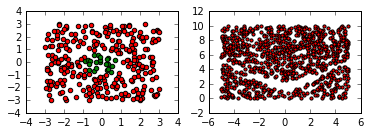

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 
from math import sqrt

N = 300
N2 = 1000

##################################################
##case1##
##################################################

x = [random.uniform(-3, 3) for i in range(N)]
y = [random.uniform(-3, 3) for i in range(N)]
z = np.zeros(N).tolist()

data1 = [(x[i], y[i],  x[i]*x[i]+y[i]*y[i]) for i in range(N) if x[i]*x[i]+y[i]*y[i] > 1.]
data2 = [(x[i], y[i],  x[i]*x[i]+y[i]*y[i]) for i in range(N) if x[i]*x[i]+y[i]*y[i] <=1.]

data1x, data1y, data1z = list(zip(*data1))
data2x, data2y, data2z = list(zip(*data2))


##################################################
##case2##
##################################################

x2 = [random.uniform(-5, 5) for i in range(N2)]
y2 = [random.uniform(0, 10) for i in range(N2)]
z2 = np.zeros(N).tolist()

data21 = [(x2[i], y2[i], x2[i]*x2[i], y2[i]*y2[i],  sqrt(2)*x2[i]*y2[i]) for i in range(N2) if y2[i]*y2[i]-x2[i]*x2[i] > 6]
data22 = [(x2[i], y2[i], x2[i]*x2[i], y2[i]*y2[i],  sqrt(2)*x2[i]*y2[i]) for i in range(N2) if y2[i]*y2[i]-x2[i]*x2[i] < 1]

data21x, data21y, data21xx, data21yy, data21z = list(zip(*data21))
data22x, data22y, data22xx, data22yy, data22z = list(zip(*data22))


###################################################
##paint##
###################################################
fig = plt.figure()

ax2d = fig.add_subplot(2, 2, 1)
ax2d.scatter(data1x, data1y, c='red')
ax2d.scatter(data2x, data2y, c='green')

ax2d = fig.add_subplot(2, 2, 2)
ax2d.scatter(data21x, data21y,s=10, c='red')
ax2d.scatter(data22x, data22y,s=10, c='red')

#ax3d = fig.add_subplot(2,2,3 ,projection='3d')
#ax3d.scatter(data1x, data1y, data1z, c='red')
#ax3d.scatter(data2x, data2y, data2z, c='green')

#ax3d = fig.add_subplot(2,2,4 ,projection='3d')
#ax3d.scatter(data21xx, data21yy, data21z, c='red')
#ax3d.scatter(data22xx, data22yy, data22z, c='green')

#plt.show()

In [1]:
print("dihofgheohgh ")

dihofgheohgh 


上例中，$P(x,y)$通过映射$\phi(P)=(x, y, x^2 +y^2)$和$\phi(P)=(x^2, y^2, \sqrt{2}xy)$将二维空间中线性不可分的点映射到三维空间中，变得线性可分了。而且因为数据量总是有限的，只要构造一个映射，使原数据映射到足够大的维数空间中，或者无穷维空间（高斯核函数），这些数据就可以被线性分割。

空间中点的相似性度量采用内积的形式：$<P_{1}, P_{2}>$，当前空间中的两点被映射到高维空间中后的相似度为：$<\phi(P_{1}),\phi(P_{2}) >$。当空间维数很大时，计算量很大。若能找到一个核函数$\Phi(P_{1}, P_{2})=<\phi(P_{1}),\phi(P_{2}) >$，就可以在当前维数的空间计算$P_{1}, P_{2}$两点在高维空间的内积，从而简化计算。上例右图中，三维空间的两点的内积为
$$\Phi(P_{1}, P_{2})=<\phi(P_{1}),\phi(P_{2}) >\\
= x_{1}^2*x_{2}^2 +y_{1}^2*y_{2}^2 +　\sqrt{2}x_{1}y_{1}*\sqrt{2}x_{2}y_{2}\\
=x_{1}^2*x_{2}^2 +y_{1}^2*y_{2}^2 +　2x_{1}y_{1}x_{2}y_{2}\\
=<P_{1},P_{2} >^2$$

如果存在一个核函数$\Phi(P_{1}, P_{2})=<\phi(P_{1}),\phi(P_{2}) >$，甚至可以不需要知道原来的映射函数$\phi(P)$！

但这种隐式的映射如何保证映射$\phi(P)$一定存在呢？Mercer定理证明了只要核函数满足一些条件，就存在这样一个（唯一的）内积结构与之对应。
Mercer定理：任何半正定的函数都可以作为核函数。所谓半正定的函数$f(x_{i},x_{j})$，是指拥有训练数据集合（x1,x2,...xn)，我们定义一个矩阵的元素$a_{ij} = f(x_{i},x_{j})$，这个矩阵是$n*n$的，如果这个矩阵是半正定的，那么$f(x_{i},x_{j})$就称为半正定的函数。

***
## RBF网络

RBF网络中的隐藏层将输入从低维空间映射到高维空间，最后在高维空间进行线性回归。RBF构建主要就是构建隐藏层的重构核和线性回归部分的W矩阵。一旦重构核确定，W可通过最小MSE等方法确定。

### 重构核的确定
1.可以使用全部输入数据作为每个重构核中心。
2.随机选取若干个重构核中心。
3.使用聚类算法（K-means等）选取若干重构核中心。

### W矩阵的确定
重构核的输出为矩阵$\Phi$：
$$
\Phi = \left[
\begin{matrix}
\Phi_{1}(X_{1}) & \Phi_{2}(X_{1}) & \cdots &\Phi_{p}(X_{1})\\
\Phi_{1}(X_{2}) & \Phi_{2}(X_{2}) & \cdots &\Phi_{p}(X_{2})\\
\vdots       & \vdots       & \ddots &\vdots\\
\Phi_{1}(X_{n}) & \Phi_{2}(X_{n}) & \cdots &\Phi_{p}(X_{n})\\
\end{matrix}
\right]
$$
其中，$\Phi_{i}$为第i个重构核，$X_{i}$为第i个输入数据。

W为权重矩阵：
$$
W = \left[
\begin{matrix}
W_{1}\\
W_{2}\\
\vdots\\
W_{p}\\
\end{matrix}
\right]　　　　　　　　　　　W_{i}为m(1<=m)维行向量，m为样本Y的维度。
$$
Y为结果：
$$
Y = \left[
\begin{matrix}
Y_{1}\\
Y_{2}\\
\vdots\\
Y_{n}\\
\end{matrix}
\right]
$$
有：
$$\Phi* W = Y\tag{3}$$
可求得$W = (\Phi^T \Phi)^{-1}\Phi^TY$

至此，RBF网络构建完成。

### 另一种确定RBF网络参数的方法

按照BP的方法，采用MIN(Y - D)的原则，采用梯度下降法逆向迭代求解$\Phi$的中点以及W中的权值。

***
## 一些并不好的结果。。。
![rbf网络结构](./3.jpg "预测偏差")
![rbf网络结构](./4.jpg "正确率")
